In [1]:
import pyEDM
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing



In [2]:
filename = 'data/output_populations_10-5000.csv'
filename2 = 'data/output_pops_E.csv'
st = 1000
ed = 2000

file = filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

print(df.head(10))



iteration     1    2    3    4    5     6     7    8     9    10
1000       1001  1381  236  802  154  216  1393  5658  106  4870  7304
1001       1002  1368  231  808  156  211  1388  5646  112  4873  7338
1002       1003  1364  226  817  157  205  1404  5627  110  4892  7362
1003       1004  1351  223  827  159  208  1407  5591  107  4927  7383
1004       1005  1355  221  824  162  207  1413  5560  104  4930  7411
1005       1006  1347  212  855  158  202  1434  5560   98  4945  7420
1006       1007  1349  209  850  153  189  1437  5528   93  4969  7421
1007       1008  1348  215  859  155  187  1450  5523   92  4982  7429
1008       1009  1344  212  885  154  188  1445  5499   95  4987  7472
1009       1010  1329  212  911  153  189  1437  5463   93  4993  7466


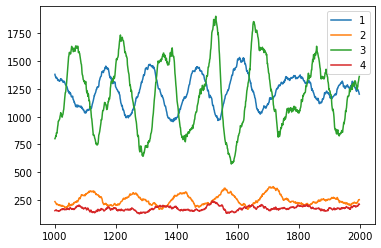

In [3]:
df[['1','2','3','4']].plot()

1         2         3         4
0  0.035159  0.029310  0.020454  0.027950
1  0.034828  0.028689  0.020607  0.028313
2  0.034726  0.028068  0.020837  0.028495
3  0.034395  0.027696  0.021092  0.028858
4  0.034497  0.027447  0.021015  0.029402
5  0.034293  0.026329  0.021806  0.028676
6  0.034344  0.025957  0.021678  0.027769
7  0.034318  0.026702  0.021908  0.028132
8  0.034217  0.026329  0.022571  0.027950
9  0.033835  0.026329  0.023234  0.027769


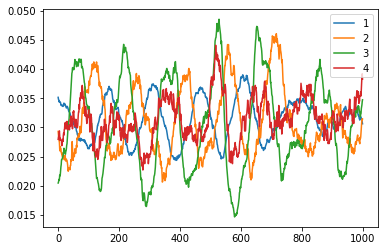

In [4]:
# Normalisation

norm_species_1 = preprocessing.normalize([np.array(df['1'])])
norm_species_2 = preprocessing.normalize([np.array(df['2'])])
norm_species_3 = preprocessing.normalize([np.array(df['3'])])
norm_species_4 = preprocessing.normalize([np.array(df['4'])])
norm_df = pd.DataFrame({'1': norm_species_1[0], '2': norm_species_2[0], '3': norm_species_3[0], '4': norm_species_4[0]}, columns=['1', '2', '3', '4'])
print(norm_df.head(10))
norm_df[['1','2','3','4']].plot()

1         2         3         4
0  1.058743 -0.309909 -1.276858 -0.974946
1  0.964875 -0.417770 -1.257612 -0.872996
2  0.935993 -0.525632 -1.228744 -0.822021
3  0.842125 -0.590349 -1.196668 -0.720072
4  0.871007 -0.633494 -1.206291 -0.567147
5  0.813242 -0.827645 -1.106856 -0.771046
6  0.827683 -0.892362 -1.122894 -1.025921
7  0.820463 -0.762928 -1.094026 -0.923971
8  0.791580 -0.827645 -1.010629 -0.974946
9  0.683271 -0.827645 -0.927232 -1.025921


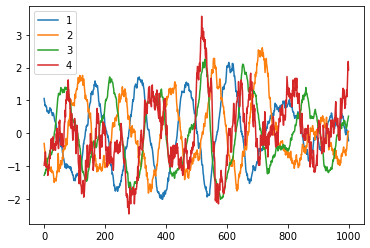

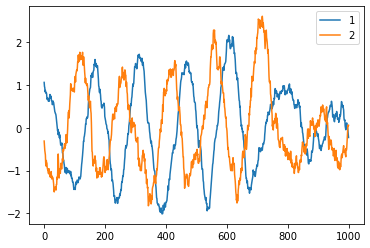

In [5]:
# Standardisation

data_df = pd.DataFrame({'1': df['1'], '2': df['2'], '3': df['3'], '4': df['4']})
col_names = data_df.columns

# Create the Scaler object
scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_df, columns=col_names)

print(scaled_df.head(10))
scaled_df[['1','2','3','4']].plot()
scaled_df[['1','2']].plot()
#scaled_df[['1','4']].plot()

In [6]:
# Embeding Dimension

# total_rows = ed-st
# lib_str = str(0) + ' ' + str(int(total_rows*0.5)) 
# pred_str = str(int(total_rows*0.5)+1) + ' ' + str(total_rows)
# print(lib_str)
# print(pred_str)

#pyEDM.EmbedDimension(dataFrame=scaled_df, lib="0 500", pred="600 800", columns="1" )
#pyEDM.EmbedDimension(dataFrame=scaled_df, lib=lib_str, pred=pred_str, columns="2" )

In [ ]:
pyEDM.CCM(dataFrame=scaled_df, E=True, columns="1", target="2", libSizes="50 500 50", showPlot=True, sample=500)